# Tutorial 8: Outputs

Once an instance of GenX is run, a series of csv files describing the outputs are created and put in to a folder titled `results`. This folder will appear automatically in the case folder. For a detailed description of all files, see the <a href="https://genxproject.github.io/GenX.jl/dev/User_Guide/model_output/" target="_blank">documentation</a> . This tutorial goes over key files in `results` and visualizes some of the outputs.

### Table of Contents
* [Power](#power)
* [Cost and Revenue](#cost)
* [Emmissions](#emms)

Let's get things started by running an instance of GenX using `Run.jl`. You can skip this step if you already have a results folder you would like to analyze. 

In [1]:
using DataFrames
using CSV
using YAML
using GraphRecipes
using Plots
using PlotlyJS
using VegaLite
using StatsPlots
using GenX

WebIO._IJuliaInit()

In [2]:
case = joinpath("example_systems_tutorials/1_three_zones_tutorials");

In [3]:
include("example_systems_tutorials/1_three_zones_tutorials/Run.jl")

Configuring Settings
Clustering Time Series Data (Grouped)...
Reading Input CSV Files
Network.csv Successfully Read!
Demand (load) data Successfully Read!
Fuels_data.csv Successfully Read!


[ Info: Thermal.csv Successfully Read.
[ Info: Vre.csv Successfully Read.
[ Info: Storage.csv Successfully Read.
[ Info: Resource_energy_share_requirement.csv Successfully Read.
[ Info: Resource_capacity_reserve_margin.csv Successfully Read.
[ Info: Resource_minimum_capacity_requirement.csv Successfully Read.



Summary of resources loaded into the model:
-------------------------------------------------------
	Resource type 		Number of resources
	Thermal        		3
	VRE            		4
	Storage        		3
Total number of resources: 10
-------------------------------------------------------
Generators_variability.csv Successfully Read!
Validating time basis
Minimum_capacity_requirement.csv Successfully Read!
CO2_cap.csv Successfully Read!
CSV Files Successfully Read In From /Users/patrickbryant/Documents/DOE/GenX.jl/GenX-Tutorials/Tutorials/example_systems_tutorials/1_three_zones_tutorials
Error: Geography Key 1 is invalid. Select `System' or `Zone'.
Configuring Solver
Loading Inputs
Reading Input CSV Files
Network.csv Successfully Read!
Demand (load) data Successfully Read!
Fuels_data.csv Successfully Read!

Summary of resources loaded into the model:
-------------------------------------------------------
	Resource type 		Number of resources
	Thermal        		3
	VRE            		4
	Storage  

[ Info: Thermal.csv Successfully Read.
[ Info: Vre.csv Successfully Read.
[ Info: Storage.csv Successfully Read.
[ Info: Resource_energy_share_requirement.csv Successfully Read.
[ Info: Resource_capacity_reserve_margin.csv Successfully Read.
[ Info: Resource_minimum_capacity_requirement.csv Successfully Read.


Discharge Module
Non-served Energy Module
Investment Discharge Module
Unit Commitment Module
Fuel Module
CO2 Module
Investment Transmission Module
Transmission Module
Dispatchable Resources Module
Storage Resources Module
Storage Investment Module
Storage Core Resources Module
Storage Resources with Symmetric Charge/Discharge Capacity Module
Thermal (Unit Commitment) Resources Module
CO2 Policies Module
Minimum Capacity Requirement Module
Time elapsed for model building is
5.162342208
Solving Model
Running HiGHS 1.7.0 (git hash: 50670fd4c): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [4e-07, 1e+01]
  Cost   [1e-04, 4e+02]
  Bound  [0e+00, 0e+00]
  RHS    [2e-03, 4e+03]
Presolving model
115683 rows, 69524 cols, 429681 nonzeros  0s
108264 rows, 62105 cols, 431223 nonzeros  0s
Presolve : Reductions: rows 108264(-45134); columns 62105(-58034); elements 431223(-84261)
Solving the presolved LP
IPX model has 108264 rows, 62105 columns and 431223 nonzeros
Inpu

Below are all 33 files output by running GenX:

In [3]:
results = cd(readdir,joinpath(case,"results"))

33-element Vector{String}:
 "CO2_prices_and_penalties.csv"
 "ChargingCost.csv"
 "EnergyRevenue.csv"
 "FuelConsumption_plant_MMBTU.csv"
 "FuelConsumption_total_MMBTU.csv"
 "Fuel_cost_plant.csv"
 "MinCapReq_prices_and_penalties.csv"
 "NetRevenue.csv"
 "RegSubsidyRevenue.csv"
 "SubsidyRevenue.csv"
 "capacity.csv"
 "capacityfactor.csv"
 "charge.csv"
 ⋮
 "power.csv"
 "power_balance.csv"
 "prices.csv"
 "reliability.csv"
 "run_settings.yml"
 "shutdown.csv"
 "start.csv"
 "status.csv"
 "storage.csv"
 "storagebal_duals.csv"
 "time_weights.csv"
 "tlosses.csv"

### Power <a id="power"></a>

In [4]:
power_balance =  CSV.read(joinpath(case,"results/power_balance.csv"),DataFrame,missingstring="NA")
Matrix(power_balance)

1850×31 Matrix{Any}:
 "Zone"           1.0       …    3.0            3.0
 "AnnualSum"      3.9735e7      -1.74339e5     -1.12462e7
 "t1"             0.0          -39.3077     -1207.38
 "t2"             0.0          -22.4474     -1167.98
 "t3"             0.0          -39.3077     -1147.77
 "t4"             0.0       …  -29.4709     -1139.69
 "t5"             0.0           -0.0        -1147.77
 "t6"             0.0          -39.3077     -1178.08
 "t7"             0.0           -0.0        -1234.66
 "t8"             0.0           -3.637      -1295.28
 "t9"          4225.69      …   -0.0        -1375.1
 "t10"         7928.75          -0.0        -1424.61
 "t11"        10905.2           -0.0        -1443.81
 ⋮                                    ⋱                   ⋮
 "t1837"       6184.08          -5.68218    -1275.08
 "t1838"       6691.16         -39.3077     -1268.01
 "t1839"       6603.73      …  -17.6995     -1260.93
 "t1840"       4679.66         -39.3077     -1295.28
 "t1841"       

The file `power.csv`, shown below, contains the power output in MW discharged by each node at each time step. Note that if `TimeDomainReduction` is enabled, the file will have fewer rows compared to the number of time steps in the `system/Demand_data.csv` file. In this case, the corresponding `Demand_data.csv` file that matches the time series in `power.csv` can be found in the `TDR_results` folder. The first row of `power.csv` indicates the zone each node belongs to, while the second row contains the total power per year. Each subsequent row represents one time step in the series.

In [5]:
power =  CSV.read(joinpath(case,"results/power.csv"),DataFrame,missingstring="NA")

Row,Resource,MA_natural_gas_combined_cycle,CT_natural_gas_combined_cycle,ME_natural_gas_combined_cycle,MA_solar_pv,CT_onshore_wind,CT_solar_pv,ME_onshore_wind,MA_battery,CT_battery,ME_battery,Total
,String15,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,Zone,1.0,2.0,3.0,1.0,2.0,2.0,3.0,1.0,2.0,3.0,0.0
2,AnnualSum,1.05406e7,3.48648e6,9.09407e5,2.91944e7,2.59293e7,3.13176e7,2.22123e7,7.90412e6,1.68114e7,5.65131e6,1.53957e8
3,t1,-0.0,-0.0,-0.0,-0.0,9210.78,-0.0,3040.31,1146.89,2608.83,2206.38,18213.2
4,t2,-0.0,-0.0,-0.0,-0.0,9022.5,-0.0,5681.08,1851.33,2661.54,0.0,19216.5
5,t3,-0.0,-0.0,-0.0,-0.0,9495.5,-0.0,5413.3,932.184,2404.83,990.082,19235.9
6,t4,-0.0,-0.0,-0.0,-0.0,2361.52,-0.0,6374.54,1396.95,5963.74,0.0,16096.7
7,t5,-0.0,-0.0,-0.0,-0.0,7019.56,-0.0,0.0,2909.5,3642.3,1677.08,15248.4
8,t6,-0.0,-0.0,-0.0,-0.0,7592.66,-0.0,7423.77,1043.83,3388.59,0.0,19448.8
9,t7,-0.0,-0.0,-0.0,-0.0,8420.49,-0.0,1418.21,3227.26,3032.78,1011.42,17110.2


Below is a visualization of the production over the first 168 hours, with the load demand curve from all three zones plotted on top:

In [6]:
# Pre-processing
tstart = 3 # time series starts at row 3 in results files
tend = 170
names_power = ["Solar","Natural_Gas","Battery","Wind"]

power_tot = DataFrame([power[!,5]+power[!,7] power[!,2]+power[!,3]+power[!,4] power[!,9]+power[!,10]+power[!,11] power[!,6]+power[!,8]],
    ["Solar","Natural_Gas","Battery","Wind"])

power_plot = DataFrame([collect(1:length(power_tot[tstart:tend,1])) power_tot[tstart:tend,1] repeat([names_power[1]],length(power_tot[tstart:tend,1]))],
    ["Hour","MW", "Resource_Type"]);

for i in range(2,4)
    power_plot_temp = DataFrame([collect(1:length(power_tot[tstart:tend,i])) power_tot[tstart:tend,i] repeat([names_power[i]],length(power_tot[tstart:tend,i]))],["Hour","MW", "Resource_Type"])
    power_plot = [power_plot; power_plot_temp]
end

loads =  CSV.read(joinpath(case,"TDR_results/Demand_data.csv"),DataFrame,missingstring="NA") # if not using Time-Domain Reduction use system/Demand_data.csv
loads_tot = loads[!,"Demand_MW_z1"]+loads[!,"Demand_MW_z2"]+loads[!,"Demand_MW_z3"]
power_plot[!,"Demand_Total"] = repeat(loads_tot[tstart-2:tend-2],4); # Demand_data.csv timeseries starts at row 2

Note that since the `power.csv` file is generated by running GenX with `TimeDomainReduction: 1`, the demands time series must be taken from the `Demand_data.csv` file located in the `TDR_results` folder.

GenX also has the ability to output the reconstructed version of power generation by setting `OutputFullTimeSeries: 1` in `genx_settings.yml`. In this case, a second version of the `power.csv` file will be created inside the `results/Full_TimeSeries` folder. To plot the reconstructed version against the demand, ensure you use the `Demand_data.csv` from the `settings` folder, not the one in the `TDR_results` folder.

Finally, if `TimeDomainReduction: 0` is set, the `power.csv` file will contain the full time series of power generation, and the `Demand_data.csv` should also be taken from the `settings` folder.

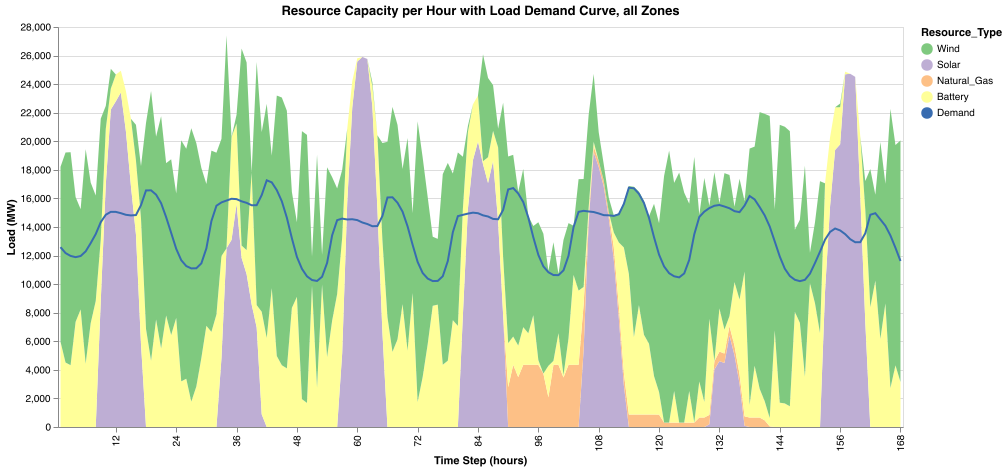

In [7]:
power_plot  |>
@vlplot()+
@vlplot(mark={:area},
    x={:Hour,title="Time Step (hours)",labels="Resource_Type:n",axis={values=0:12:168}}, y={:MW,title="Load (MW)",type="quantitative"},
    color={"Resource_Type:n",scale={scheme="accent"},sort="descending"},order={field="Resource_Type:n"},width=845,height=400)+
@vlplot(mark=:line,x=:Hour,y=:Demand_Total,lables="Demand",color={datum="Demand",legend={title=nothing}},title="Resource Capacity per Hour with Load Demand Curve, all Zones")

We can separate it by zone in the following plot:

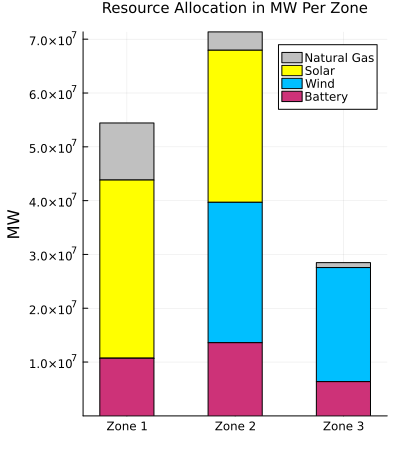

In [9]:
Zone1 = [power[2,2] power[2,5] 0 power[2,9]]
Zone2 = [power[2,3] power[2,7] power[2,6] power[2,10]]
Zone3 = [power[2,4] 0 power[2,8] power[2,11]]

colors=[:silver :yellow :deepskyblue :violetred3]

groupedbar(["Zone 1", "Zone 2", "Zone 3"],[Zone1; Zone2; Zone3], bar_position = :stack, bar_width=0.5,size=(400,450),
    labels=["Natural Gas" "Solar" "Wind" "Battery"],
    title="Resource Allocation in MW Per Zone",ylabel="MW",color=colors, titlefontsize=10)

Below is a heatmap for the natural gas plant in Massachusetts. It is normalized by the end capacity in `capcity.csv`. To change which plant the heat map plots, change the DataFrame column in `power` when defining `power_cap` below, and the corresponding capacity.

In [10]:
capacity = CSV.read(joinpath(case,"results/capacity.csv"),DataFrame,missingstring="NA")
Period_map = CSV.read(joinpath(case,"TDR_results/Period_map.csv"),DataFrame,missingstring="NA")

# Take the EndCap and power of MA_natural_gas_combined_cycle
cap = capacity[1,"EndCap"]
power_cap = power[3:end,"MA_natural_gas_combined_cycle"]/cap;

# Reconstruction of all hours of the year from TDR
recon = []
for i in range(1,52)
    index = Period_map[i,"Rep_Period_Index"]
    recon_temp = power_cap[(168*index-167):(168*index)]
    recon = [recon; recon_temp]
end

# Convert to matrix format 
heat = recon[1:24]
for i in range(1,364)
    heat = [heat recon[(i*24-23):(i*24)]]
end

In [11]:
recon

8736-element Vector{Any}:
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
  ⋮
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0

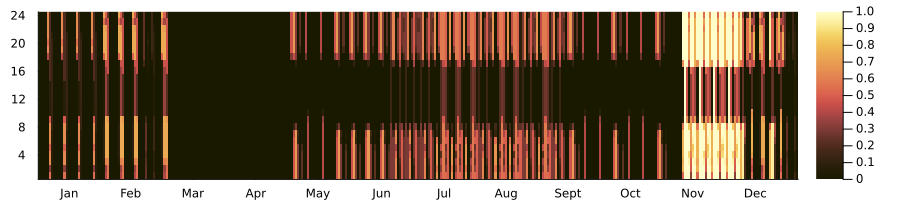

In [12]:
Plots.heatmap(heat,yticks=0:4:24,xticks=([15:30:364;],
        ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"]),
    size=(900,200),c=:lajolla)

### Cost and Revenue <a id="cost"></a>

The basic cost of each power plant and the revenue it generates can be found in files `costs.csv`, `NetRevenue.csv`,and `EnergyRevenue.csv`. `NetRevenue.csv` breaks down each specific cost per node in each zone, which is useful to visualize what the cost is coming from.

In [13]:
netrevenue =  CSV.read(joinpath(case,"results/NetRevenue.csv"),DataFrame,missingstring="NA")

Row,region,Resource,zone,Cluster,R_ID,Inv_cost_MW,Inv_cost_MWh,Inv_cost_charge_MW,Fixed_OM_cost_MW,Fixed_OM_cost_MWh,Fixed_OM_cost_charge_MW,Var_OM_cost_out,Fuel_cost,Var_OM_cost_in,StartCost,Charge_cost,CO2SequestrationCost,EnergyRevenue,SubsidyRevenue,OperatingReserveRevenue,OperatingRegulationRevenue,ReserveMarginRevenue,ESRRevenue,EmissionsCost,RegSubsidyRevenue,Revenue,Cost,Profit
,String3,String31,Int64,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,MA,MA_natural_gas_combined_cycle,1,1,1,4.61421e8,0.0,0.0,7.25786e7,0.0,0.0,3.76472e7,2.29611e8,0.0,3.73748e7,0.0,0.0,3.40737e9,0.0,0.0,0.0,0.0,0.0,2.56874e9,0.0,3.40737e9,3.40737e9,-3.57628e-5
2,CT,CT_natural_gas_combined_cycle,2,1,2,1.84017e8,0.0,0.0,2.72874e7,0.0,0.0,1.21826e7,5.96827e7,0.0,1.11515e7,0.0,0.0,1.12352e9,0.0,0.0,0.0,0.0,0.0,8.292e8,0.0,1.12352e9,1.12352e9,-1.43051e-6
3,ME,ME_natural_gas_combined_cycle,3,1,3,3.95746e7,0.0,0.0,9.85795e6,0.0,0.0,4.13615e6,2.36503e7,0.0,4.07771e6,0.0,0.0,2.87324e8,0.0,0.0,0.0,0.0,0.0,2.06027e8,0.0,2.87324e8,2.87324e8,-4.17233e-7
4,MA,MA_solar_pv,1,1,4,1.79471e9,0.0,0.0,3.9471e8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.18942e9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.18942e9,2.18942e9,-2.86102e-6
5,CT,CT_onshore_wind,2,1,5,1.31141e9,0.0,0.0,5.82916e8,0.0,0.0,2.60932e6,0.0,0.0,0.0,0.0,0.0,1.89694e9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.89694e9,1.89694e9,2.6226e-6
6,CT,CT_solar_pv,2,1,6,1.59069e9,0.0,0.0,3.49841e8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.94054e9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.94054e9,1.94054e9,-4.76837e-7
7,ME,ME_onshore_wind,3,1,7,1.11374e9,0.0,0.0,4.95051e8,0.0,0.0,2.11953e6,0.0,0.0,0.0,0.0,0.0,1.61091e9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.61091e9,1.61091e9,-6.67572e-6
8,MA,MA_battery,1,0,8,7.79333e7,5.00352e8,0.0,1.94793e7,1.25055e8,0.0,1.60586e6,0.0,1.89728e6,0.0,4.03277e8,0.0,1.0705e9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0705e9,1.1296e9,-5.91043e7
9,CT,CT_battery,2,0,9,9.35568e7,4.7821e8,0.0,2.33844e7,1.19521e8,0.0,2.03913e6,0.0,2.40918e6,0.0,6.27196e8,0.0,1.26773e9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.26773e9,1.34632e9,-7.85846e7


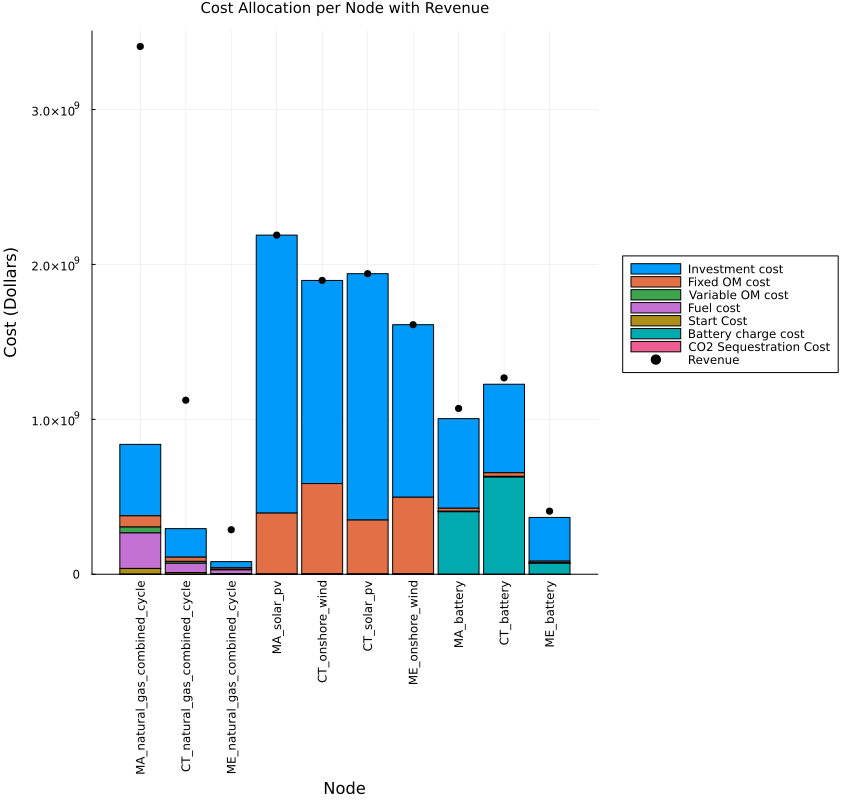

In [14]:
xnames = netrevenue[!,2]
names1 =  ["Investment cost" "Fixed OM cost" "Variable OM cost" "Fuel cost" "Start Cost" "Battery charge cost" "CO2 Sequestration Cost" "Revenue"]

netrev = [netrevenue[!,6]+netrevenue[!,7]+netrevenue[!,8] netrevenue[!,9]+netrevenue[!,11]+netrevenue[!,11] netrevenue[!,12]+netrevenue[!,14] netrevenue[!,13] netrevenue[!,15] netrevenue[!,16] netrevenue[!,17]]

groupedbar(xnames,netrev, bar_position = :stack, bar_width=0.9,size=(850,800),
    labels=names1,title="Cost Allocation per Node with Revenue",xlabel="Node",ylabel="Cost (Dollars)", 
    titlefontsize=10,legend=:outerright,ylims=[0,maximum(netrevenue[!,"Revenue"])+1e8],xrotation = 90)
StatsPlots.scatter!(xnames,netrevenue[!,"Revenue"],label="Revenue",color="black")

### Emissions  <a id="emms"></a>

The file `emmissions.csv` gives the total CO2 emmissions per zone for each hour GenX runs. The first three rows give the marginal CO2 abatement cost in $/ton CO2.

In [15]:
emm1 =  CSV.read(joinpath(case,"results/emissions.csv"),DataFrame)

Row,Zone,1,2,3,Total
,String15,Float64,Float64,Float64,Float64
1,CO2_Price_1,608.439,0.0,0.0,0.0
2,CO2_Price_2,0.0,637.085,0.0,0.0
3,CO2_Price_3,0.0,0.0,332.289,0.0
4,AnnualSum,4.22186e6,1.30155e6,6.20026e5,6.14344e6
5,t1,0.0,0.0,0.0,0.0
6,t2,0.0,0.0,0.0,0.0
7,t3,0.0,0.0,0.0,0.0
8,t4,0.0,0.0,0.0,0.0
9,t5,0.0,0.0,0.0,0.0


In [16]:
# Pre-processing
tstart = 470
tend = 1500
names_emm = ["Zone 1","Zone 2","Zone 3"]

emm_tot = DataFrame([emm1[3:end,2] emm1[3:end,3] emm1[3:end,4]],
    ["Zone 1","Zone 2","Zone 3"])


emm_plot = DataFrame([collect((tstart-3):(tend-3)) emm_tot[tstart:tend,1] repeat([names_emm[1]],(tend-tstart+1))],
    ["Hour","MW","Zone"]);

for i in range(2,3)
    emm_plot_temp = DataFrame([collect((tstart-3):(tend-3)) emm_tot[tstart:tend,i] repeat([names_emm[i]],(tend-tstart+1))],["Hour","MW","Zone"])
    emm_plot = [emm_plot; emm_plot_temp]
end

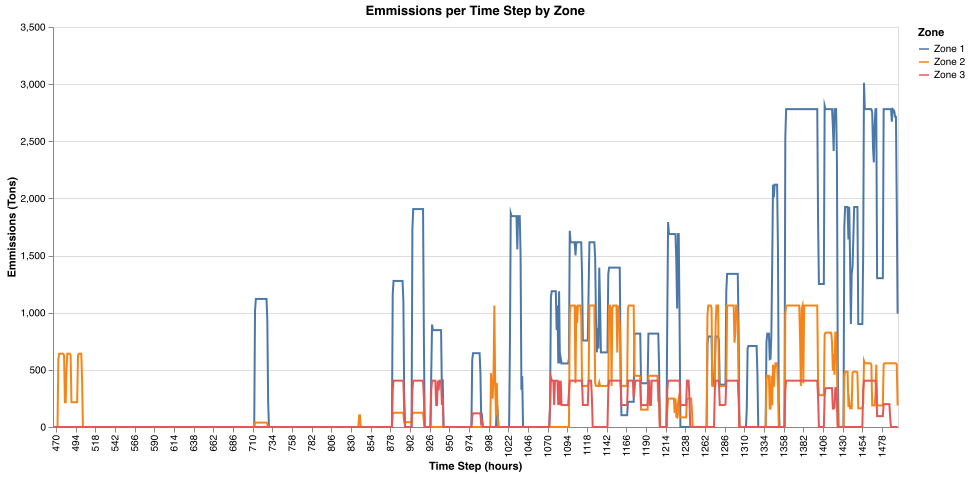

In [17]:
emm_plot  |>
@vlplot(mark={:line},
    x={:Hour,title="Time Step (hours)",labels="Zone:n",axis={values=tstart:24:tend}}, y={:MW,title="Emmissions (Tons)",type="quantitative"},
    color={"Zone:n"},width=845,height=400,title="Emmissions per Time Step by Zone")

Let's try changing the CO2 cap, as in Tutorial 7, and plotting the resulting emmissions.

In [18]:
genx_settings_TZ = YAML.load(open((joinpath(case,"settings/genx_settings.yml"))))
genx_settings_TZ["CO2Cap"] = 0
YAML.write_file((joinpath(case,"settings/genx_settings.yml")), genx_settings_TZ)

include("example_systems_tutorials/1_three_zones_tutorials/Run.jl")

# run outside of notebook

  ____           __  __   _ _
 / ___| ___ _ __ \ \/ /  (_) |
| |  _ / _ \ '_ \ \  /   | | |
| |_| |  __/ | | |/  \ _ | | |
 \____|\___|_| |_/_/\_(_)/ |_|
                       |__/
 Version: 0.4.1-dev.12

Configuring Settings
Time Series Data Already Clustered.
Configuring Solver
Loading Inputs
Reading Input CSV Files
Network.csv Successfully Read!
Demand (load) data Successfully Read!
Fuels_data.csv Successfully Read!

Summary of resources loaded into the model:
-------------------------------------------------------
	Resource type 		Number of resources
	Thermal        		3
	VRE            		4
	Storage        		3
Total number of resources: 10
-------------------------------------------------------
Generators_variability.csv Successfully Read!
Validating time basis
Minimum_capacity_requirement.csv Successfully Read!
CSV Files Successfully Read In From /Users/lb9239/Documents/ZERO_lab/GenX/GenX-Tutorials/Tutorials/example_systems_tutorials/1_three_zones_tutorials
Generating the Optimiza

[ Info: Thermal.csv Successfully Read.
[ Info: Vre.csv Successfully Read.
[ Info: Storage.csv Successfully Read.
[ Info: Resource_energy_share_requirement.csv Successfully Read.
[ Info: Resource_capacity_reserve_margin.csv Successfully Read.
[ Info: Resource_minimum_capacity_requirement.csv Successfully Read.


Investment Discharge Module
Unit Commitment Module
Fuel Module
CO2 Module
Investment Transmission Module
Transmission Module
Dispatchable Resources Module
Storage Resources Module
Storage Investment Module
Storage Core Resources Module
Storage Resources with Symmetric Charge/Discharge Capacity Module
Thermal (Unit Commitment) Resources Module
Minimum Capacity Requirement Module
Time elapsed for model building is
0.429794709
Solving Model
Running HiGHS 1.8.1 (git hash: 4a7f24ac6): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [4e-07, 1e+01]
  Cost   [2e-04, 4e+02]
  Bound  [0e+00, 0e+00]
  RHS    [2e-03, 2e+01]
Presolving model
115615 rows, 69429 cols, 396747 nonzeros  0s
104853 rows, 58667 cols, 385803 nonzeros  0s
Presolve : Reductions: rows 104853(-48542); columns 58667(-61468); elements 385803(-85280)
Solving the presolved LP
IPX model has 104853 rows, 58667 columns and 385803 nonzeros
Input
    Number of variables:                                5866

In [19]:
emm2 =  CSV.read(joinpath(case,"results_1/emissions.csv"),DataFrame)

Row,Zone,1,2,3,Total
,String15,Float64,Float64,Float64,Float64
1,AnnualSum,1.68857e7,1.48565e7,0.0,3.17422e7
2,t1,2385.66,15.0283,0.0,2400.69
3,t2,2275.67,15.0283,0.0,2290.7
4,t3,2066.24,15.0283,0.0,2081.27
5,t4,2355.94,15.0283,0.0,2370.97
6,t5,2748.06,15.0283,0.0,2763.09
7,t6,2717.48,15.0283,0.0,2732.51
8,t7,2716.17,15.0283,0.0,2731.2
9,t8,3250.11,15.0283,0.0,3265.14


In [20]:
# Pre-processing
tstart = 470
tend = 1500
names_emm = ["Zone 1","Zone 2","Zone 3"]

emm_tot2 = DataFrame([emm2[3:end,2] emm2[3:end,3] emm2[3:end,4]],
    ["Zone 1","Zone 2","Zone 3"])


emm_plot2 = DataFrame([collect((tstart-3):(tend-3)) emm_tot2[tstart:tend,1] repeat([names_emm[1]],(tend-tstart+1))],
    ["Hour","MW","Zone"]);

for i in range(2,3)
    emm_plot_temp = DataFrame([collect((tstart-3):(tend-3)) emm_tot2[tstart:tend,i] repeat([names_emm[i]],(tend-tstart+1))],["Hour","MW","Zone"])
    emm_plot2 = [emm_plot2; emm_plot_temp]
end

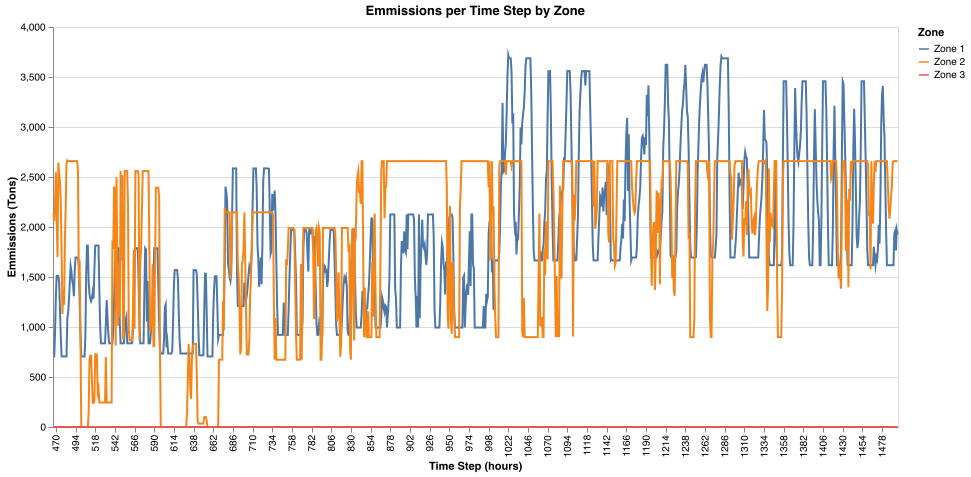

In [21]:
emm_plot2  |>
@vlplot(mark={:line},
    x={:Hour,title="Time Step (hours)",labels="Zone:n",axis={values=tstart:24:tend}}, y={:MW,title="Emmissions (Tons)",type="quantitative"},
    color={"Zone:n"},width=845,height=400,title="Emmissions per Time Step by Zone")

We can see how the emmissions, summed over all zones, compare in the following plot:

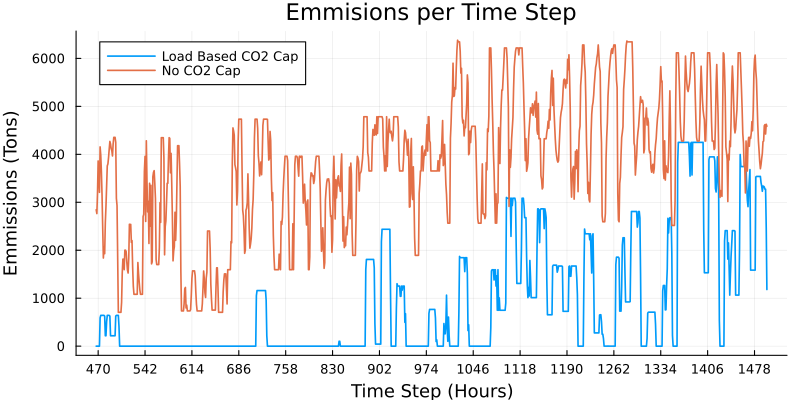

In [22]:
emm1sum = sum(eachcol(emm_tot));
emm2sum = sum(eachcol(emm_tot2));

Plots.plot(collect((tstart-3):(tend-3)),emm1sum[tstart:tend],size=(800,400),label="Load Based CO2 Cap",
    xlabel="Time Step (Hours)",ylabel="Emmissions (Tons)",thickness_scaling = 1.1,linewidth = 1.5,
    title="Emmisions per Time Step",xticks=tstart:72:tend)
Plots.plot!(collect((tstart-3):(tend-3)),emm2sum[tstart:tend],label="No CO2 Cap",linewidth = 1.5)

Finally, set the CO2 Cap back to 2:

In [23]:
genx_settings_TZ["CO2Cap"] = 2
YAML.write_file((joinpath(case,"settings/genx_settings.yml")), genx_settings_TZ)